In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import sys
sys.path.append('/home/yat-lok/workspace/tvbtools/')
from tools.signaltools import SignalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
import typing
from typing import List
import seaborn as sns

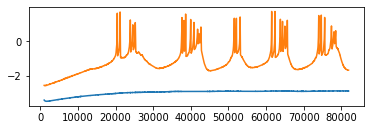

In [2]:
# read data
filename = '/mnt/d/data/LFP/SNC/2820A/2820A_0.014.csv'
df = pd.read_csv(filename)
df_left = df.iloc[1024:,4]
df_right = df.iloc[1024:,6]
# # visualize results
fig = plt.figure()
axes = fig.add_subplot(211)
axes.plot(df_left)
axes.plot(df_right)
plt.show()


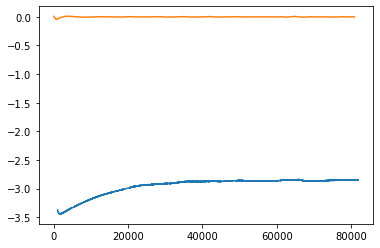

In [3]:
y = SignalToolkit.sos_filter(df_left, [10,60], 81920)
plt.plot(df_left)
plt.plot(y)
plt.show()

In [4]:
print(SignalToolkit.PAC(df_right, [2,10], [30,120], fs=81920))
print(SignalToolkit.PAC(df_left, [2,10], [30,120], fs=81920))
# SignalToolkit.PAC_comodulogram(df_right, [2,20,1],[30, 200, 5], fs=81920)
# SignalToolkit.PAC_comodulogram(df_left, [2,20,1],[30, 200, 5], fs=81920)


0.13835418658288312
0.03449943487992548


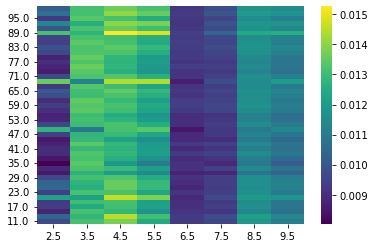

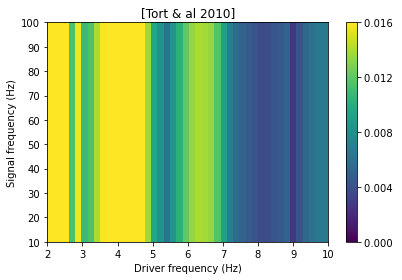

In [5]:
########
# test #
########

import numpy as np
import matplotlib.pyplot as plt

from pactools import Comodulogram, REFERENCES
from pactools import simulate_pac

fs = 81920.  # Hz
high_fq = 50.0  # Hz
low_fq = 5.0  # Hz
low_fq_width = 1.0  # Hz

n_points = 10000
noise_level = 0.4

signala = simulate_pac(n_points=n_points, fs=fs, high_fq=high_fq, low_fq=low_fq,
                      low_fq_width=low_fq_width, noise_level=noise_level,
                      random_state=0)



signala = df_right
SignalToolkit.PAC_comodulogram(signala, [2,10,1],[10, 100, 2], fs=81920)
low_fq_range = np.linspace(1, 10, 50)
# methods = [
#     'ozkurt', 'canolty', 'tort', 'penny', 'vanwijk', 'duprelatour', 'colgin',
#     'sigl', 'bispectrum'
# ]
methods = ['tort']

# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
# fig, axs = plt.subplots(
#     n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
fig = plt.figure()
axs = fig.add_subplot(111)
# axs = axs.ravel()
estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=methods[0],
                             progress_bar=False)
estimator.fit(signala)
estimator.plot(titles=[REFERENCES[methods[0]]], axs=[axs],vmin=0, vmax=0.016)
axs.set_xlim([2,10])
axs.set_ylim([10, 100])

# Compute the comodulograms and plot them
# for ax, method in zip(axs, methods):
#     print('%s... ' % (method, ))
#     estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
#                              low_fq_width=low_fq_width, method=method,
#                              progress_bar=False)
#     estimator.fit(signala)
#     estimator.plot(titles=[REFERENCES[method]], axs=[ax])

plt.show()

In [6]:
# %matplotlib widget
# # hilbert transform
# # step 1, get the amplitude envelop of high freq
# h1=signal.hilbert(df_left_high)
# amplitude_envelope = np.abs(h1)

# # step 2, get the phase information of low freq
# l1 = signal.hilbert(df_left_low)
# phase_y1=np.angle(l1)

# # step 3 bin the phase
# cycle = len(l1)/360
# stamp = range(int(cycle))
# phase_amp = []
# for i in stamp:
#     amp_value = np.mean(amplitude_envelope[i*360:(i+1)*360])
#     phase_amp.append(amp_value)
# # step 4, entropy method H
# p_j = [p_j_single/np.sum(phase_amp) for p_j_single in phase_amp]
# cap_H = -np.sum(p_j * np.log(p_j))

# # step 5, calculate the MI
# MI = (np.log(len(stamp))-cap_H) / np.log(len(stamp))
# print(MI)

# x_axes1 = [*stamp]

# fig = plt.figure()
# axes1 = fig.add_subplot(221)
# axes1.bar(x_axes1, phase_amp)

# # graph 2
# axes2 = fig.add_subplot(222)
# axes2.set_title("raw plot with low and high \nfrequency bands signal")
# axes2.plot(df_left)
# axes2.plot(df_left_low)
# axes2.plot(df_left_high)

# axes3 = fig.add_subplot(223)
# axes3.plot(df_left_high)
# axes3.plot(amplitude_envelope)

# axes4 = fig.add_subplot(224)
# axes4.plot(df_left_low)
# axes4.plot(phase_y1, "o")
# plt.show()

Phase Amplitude Coupling object defined
WARNING | MVL is amplitude dependent which means that if the amplitude increases, MVL also increases. You should select a normalization method for correcting this limitation (e.g idpac=(1, 2, 4))
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    true PAC estimation using Modulation Index (MI, Tort et al. 2010)
    true PAC estimation using Heights ratio (HR, Lakatos et al. 2005)
    true PAC estimation using Normalized Direct Pac (ndPac, Ozkurt et al. 2012)
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    true PAC estimation using Gaussian Copula PAC (gcPac)


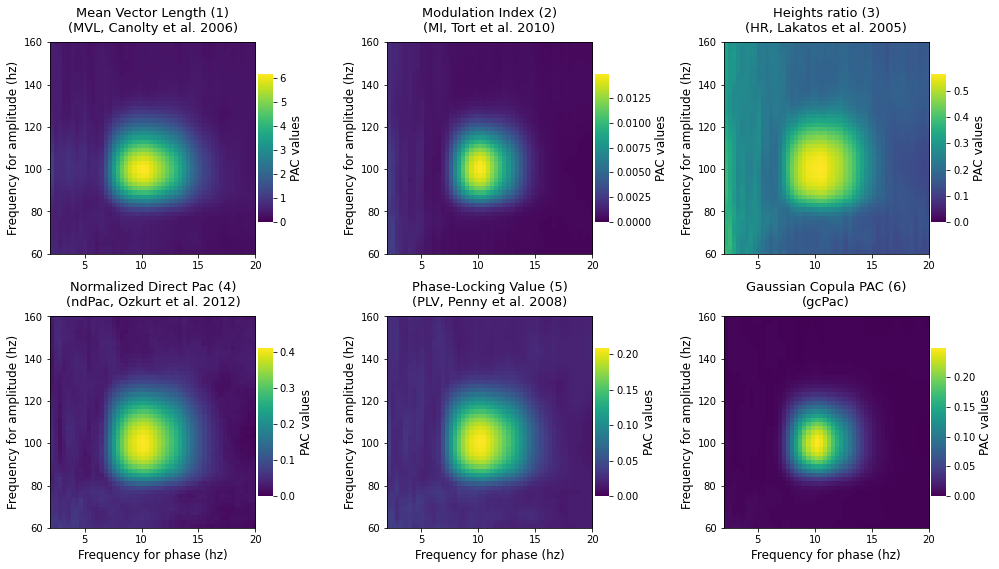

In [17]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_tort, pac_signals_wavelet
import matplotlib.pyplot as plt

f_pha = 10      # frequency phase for the coupling
f_amp = 100     # frequency amplitude for the coupling
n_epochs = 20   # number of trials
n_times = 4000  # number of time points
sf = 512.       # sampling frequency
data, time = pac_signals_wavelet(sf=sf, f_pha=f_pha, f_amp=f_amp, noise=.8,
                              n_epochs=n_epochs, n_times=n_times)
# define a pac object and extract high-resolution phases and amplitudes using
# Morlet's wavelets
p = Pac(f_pha='hres', f_amp='hres', dcomplex='wavelet')
# etract all of the phases and amplitudes
phases = p.filter(sf, data, ftype='phase', n_jobs=1)
amplitudes = p.filter(sf, data, ftype='amplitude', n_jobs=1)

plt.figure(figsize=(14, 8))
for i, k in enumerate([1, 2, 3, 4, 5, 6]):
    # switch method of PAC
    p.idpac = (k, 0, 0)
    # compute only the pac without filtering
    xpac = p.fit(phases, amplitudes)
    # plot
    plt.subplot(2, 3, k)
    title = p.method.replace(' (', f' ({k})\n(')
    p.comodulogram(xpac.mean(-1), title=title, cmap='viridis')
    if k <= 3:
        plt.xlabel('')

plt.tight_layout()
plt.show()
